In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [131]:
df = pd.read_csv('water_potability.csv',encoding='unicode_escape')

In [132]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.8904555,20791.31898,7.300211873,368.516441,564.3086542,10.37978308,86.99097046,2.963135381,0
1,3.716080075,129.4229205,18630.05786,6.635245884,NaN,592.8853591,15.18001312,56.32907628,4.500656275,0
2,8.099124189,224.2362594,19909.54173,9.275883603,NaN,418.6062131,16.86863693,66.42009251,3.05593375,0
3,8.316765884,214.3733941,22018.41744,8.059332377,356.886136,363.2665162,18.4365245,100.3416744,4.628770537,0
4,9.092223456,181.1015092,17978.98634,6.546599974,310.135738,398.4108134,11.55827944,31.99799273,4.075075425,0


In [133]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [134]:
df.duplicated().sum()

0

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   object 
 1   Hardness         3276 non-null   object 
 2   Solids           3276 non-null   object 
 3   Chloramines      3276 non-null   object 
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   object 
 6   Organic_carbon   3276 non-null   object 
 7   Trihalomethanes  3114 non-null   object 
 8   Turbidity        3276 non-null   object 
 9   Potability       3276 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 256.1+ KB


In [136]:
df['ph'].value_counts()

3.716080075    1
6.704431913    1
5.91580675     1
8.136497869    1
6.493764175    1
              ..
7.808012212    1
5.895948983    1
7.269652253    1
9.489600966    1
7.874671358    1
Name: ph, Length: 2785, dtype: int64

In [137]:
df['ph'].isnull().sum()

491

In [138]:
df.isnull().sum()/len(df)*100

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

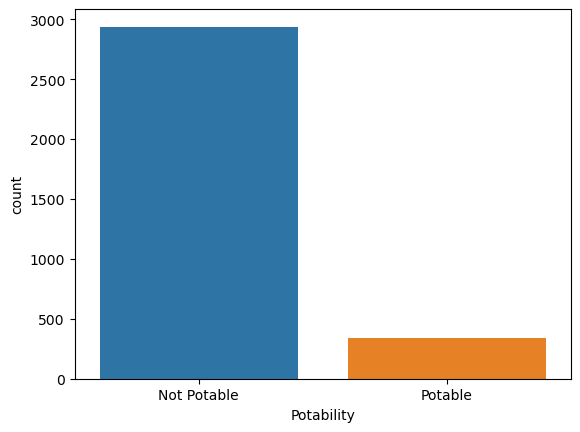

In [139]:
ax = sns.countplot(x = "Potability",data= df, saturation=0.8)
plt.xticks(ticks=[0, 1], labels = ["Not Potable", "Potable"])
plt.show()

In [140]:
x = df.Potability.value_counts()
labels = [0,1]
print(x)

0    2938
1     338
Name: Potability, dtype: int64


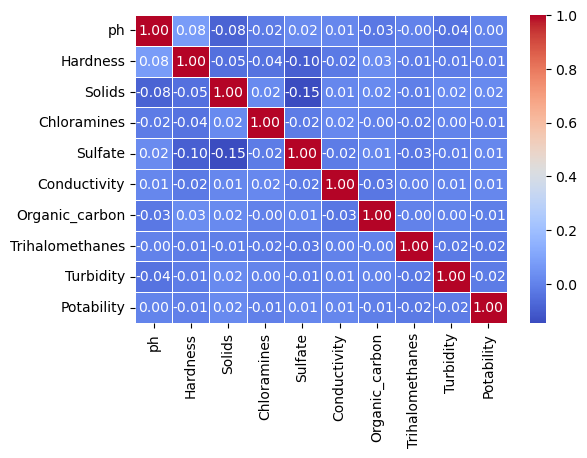

In [205]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (6, 4))
sns.heatmap(df.corr(), annot= True, cmap = 'coolwarm', fmt = '.2f', linewidths = 0.5)
plt.show()

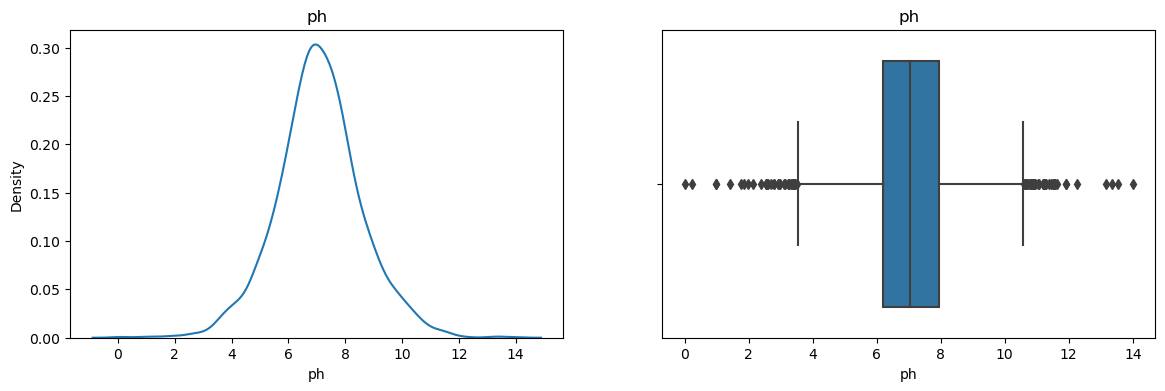

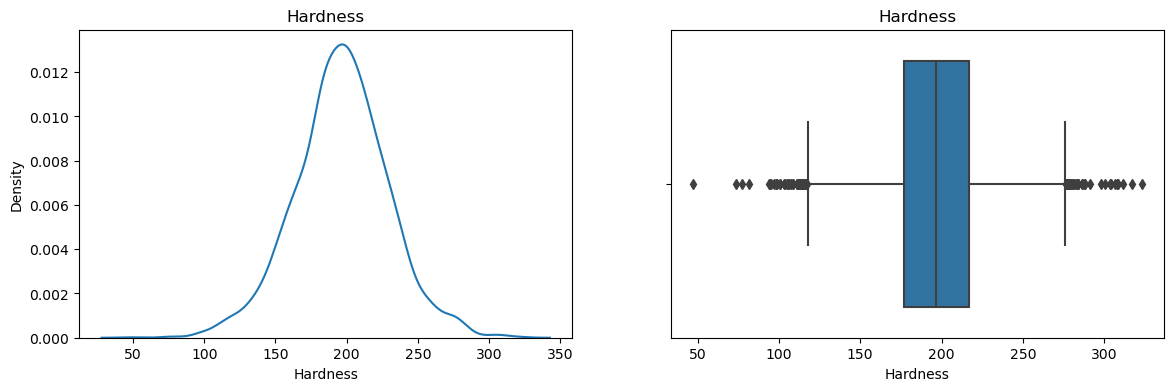

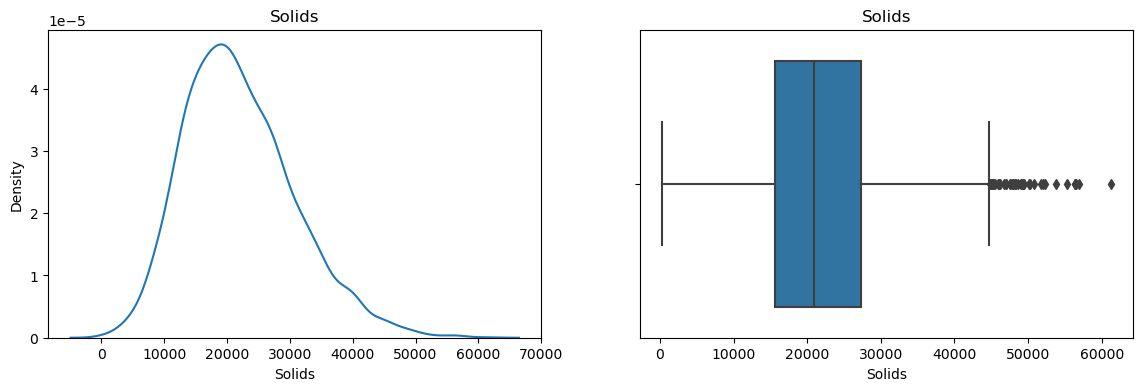

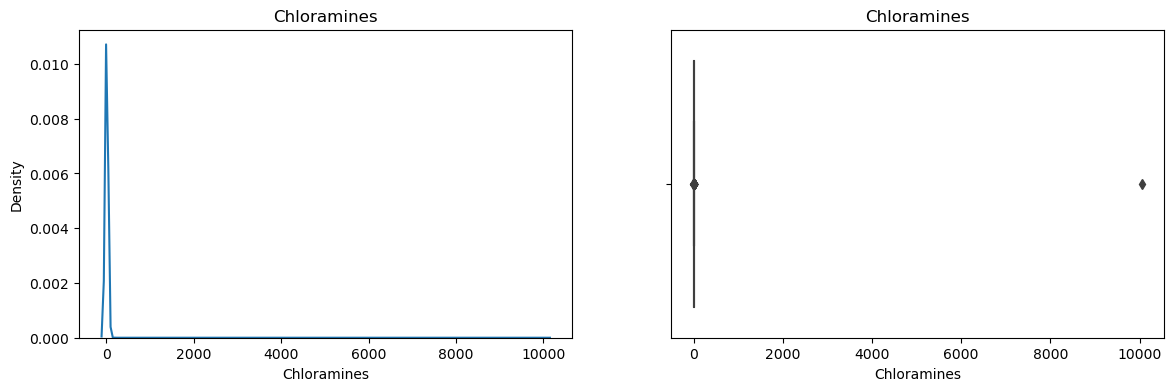

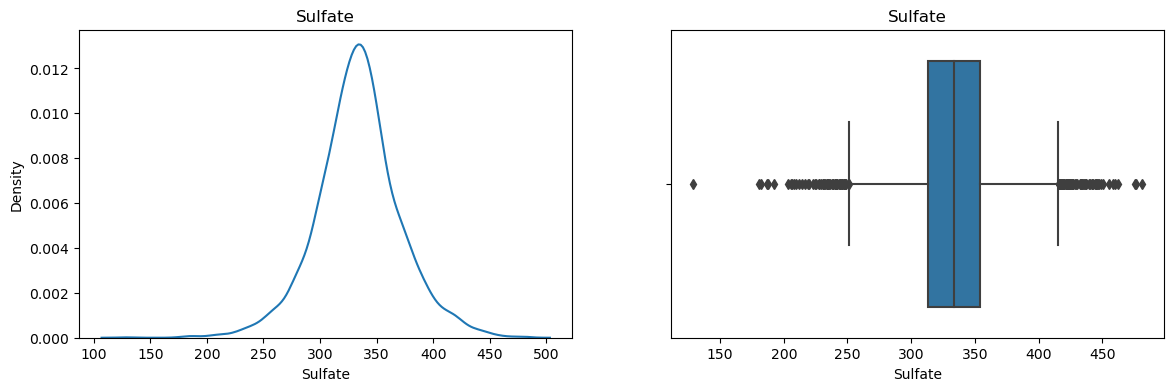

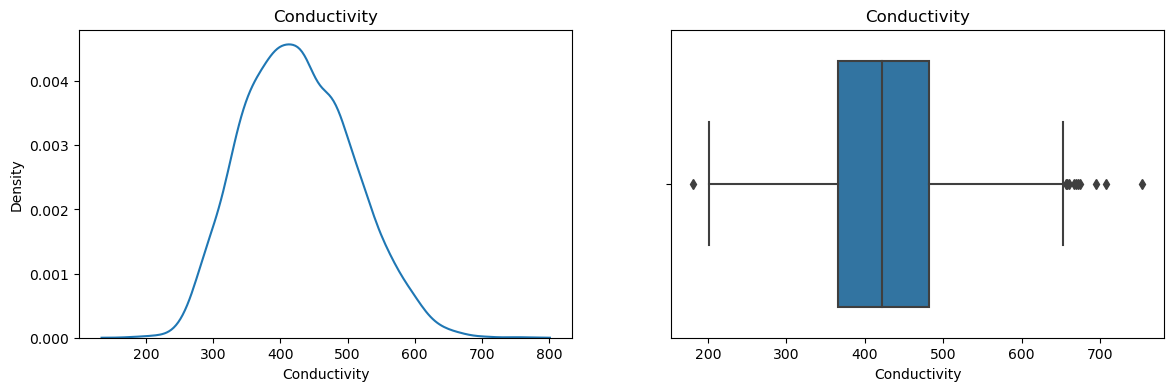

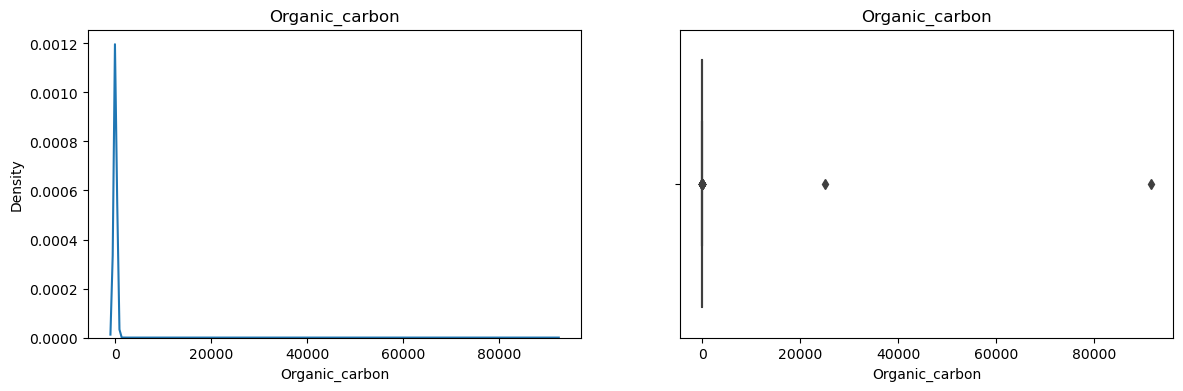

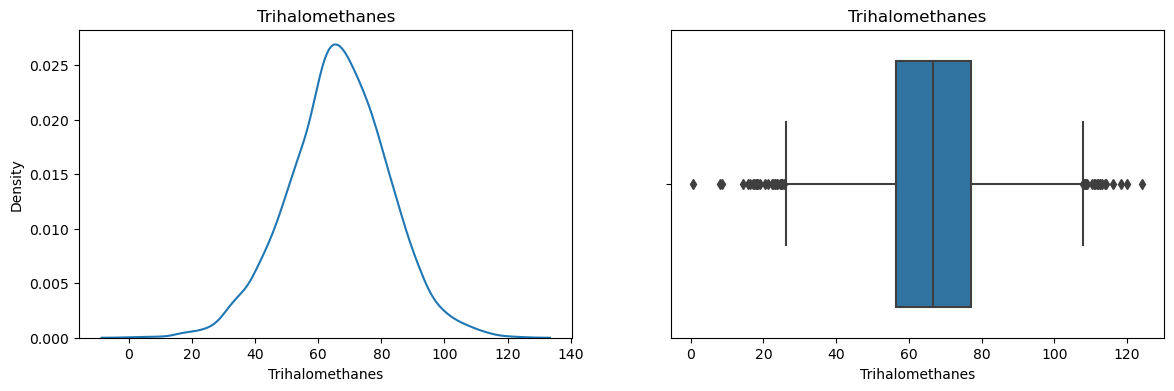

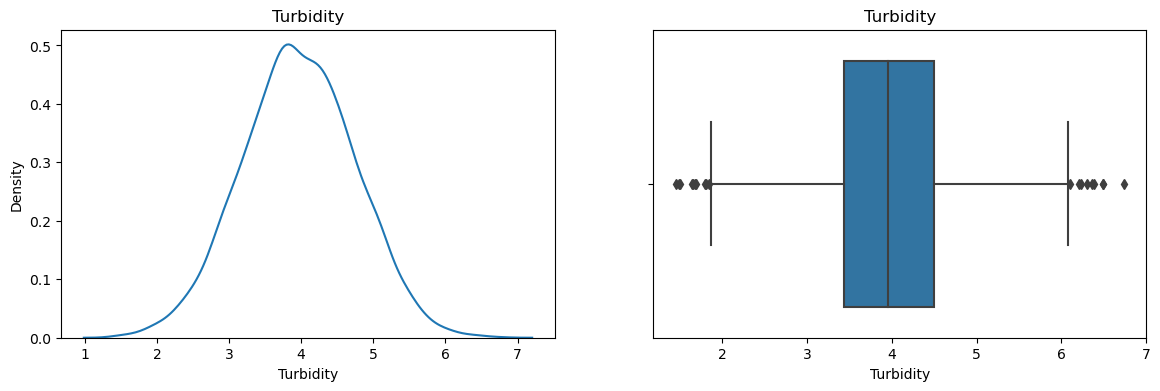

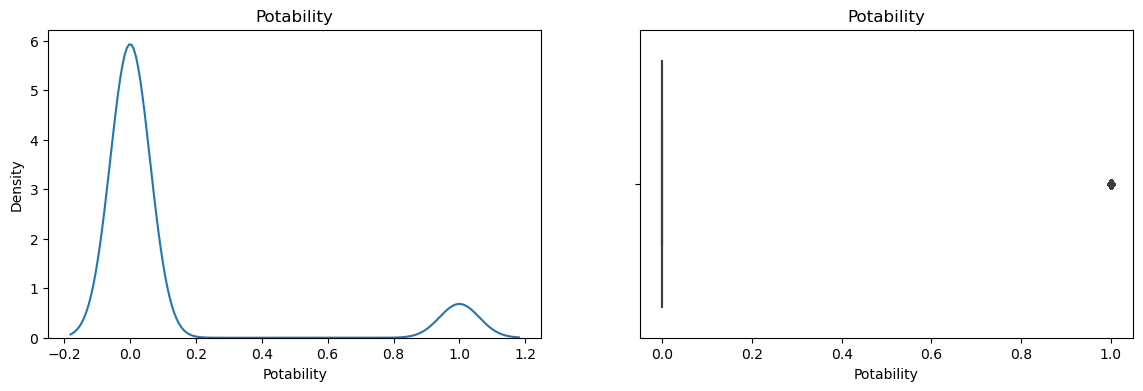

In [199]:
for col in df.columns:
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.kdeplot(data=df, x = col)
    plt.title(col)

    plt.subplot(122)
    sns.boxplot(data=df, x=col, orient='h')
    plt.title(col)

    plt.show()

In [141]:
df['Trihalomethanes'].unique()

array(['86.99097046', '56.32907628', '66.42009251', ..., '69.84540029',
       '77.4882131', '78.69844633'], dtype=object)

In [142]:
df['ph'].unique()

array([nan, '3.716080075', '8.099124189', ..., '9.419510316',
       '5.126762923', '7.874671358'], dtype=object)

In [143]:
df['Trihalomethanes']

0       86.99097046
1       56.32907628
2       66.42009251
3       100.3416744
4       31.99799273
           ...     
3271    66.68769479
3272            NaN
3273    69.84540029
3274     77.4882131
3275    78.69844633
Name: Trihalomethanes, Length: 3276, dtype: object

In [144]:
df['Trihalomethanes'] = pd.to_numeric(df['Trihalomethanes'],errors='coerce')

In [145]:
df['ph'] = pd.to_numeric(df['ph'],errors='coerce')

In [146]:
df['Sulfate'] = pd.to_numeric(df['Sulfate'],errors='coerce')

In [147]:
from sklearn.impute import KNNImputer

imputer = KNNImputer()
df[['ph','Sulfate','Trihalomethanes']] = imputer.fit_transform(df[['ph','Sulfate','Trihalomethanes']])

In [148]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   object 
 2   Solids           3276 non-null   object 
 3   Chloramines      3276 non-null   object 
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   object 
 6   Organic_carbon   3276 non-null   object 
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   object 
 9   Potability       3276 non-null   int64  
dtypes: float64(3), int64(1), object(6)
memory usage: 256.1+ KB


In [150]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [151]:
df['Hardness'] = pd.to_numeric(df['Hardness'],errors='coerce')
df['Solids'] = pd.to_numeric(df['Solids'],errors='coerce')
df['Chloramines'] = pd.to_numeric(df['Chloramines'],errors='coerce')
df['Conductivity'] = pd.to_numeric(df['Conductivity'],errors='coerce')
df['Turbidity'] = pd.to_numeric(df['Turbidity'],errors='coerce')
df['Organic_carbon'] = pd.to_numeric(df['Organic_carbon'],errors='coerce')

In [152]:
from sklearn.impute import KNNImputer

imputer = KNNImputer()
df[['Hardness','Solids','Chloramines','Conductivity','Turbidity','Organic_carbon']] = imputer.fit_transform(df[['Hardness','Solids','Chloramines','Conductivity','Turbidity','Organic_carbon']])

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [157]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score,accuracy_score, precision_score, recall_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [158]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()

In [159]:
X = df.drop(['Potability'],axis=1)
y = df['Potability']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =3)

In [160]:
X = scaler.fit_transform(X)
X

array([[-0.22216585,  0.25968184, -0.13984981, ..., -0.02382618,
         1.2968042 , -1.28653912],
       [-2.24852027, -2.03602189, -0.38647586, ..., -0.02092717,
        -0.63974835,  0.6839367 ],
       [ 0.68215777,  0.8481764 , -0.24047126, ..., -0.01990736,
        -0.0024171 , -1.16760939],
       ...,
       [ 1.56502057, -0.62637891,  1.27106183, ..., -0.02342802,
         0.21391945, -0.85625698],
       [-1.30528147,  1.04187412, -1.14488641, ..., -0.02334958,
         0.69662637,  0.95051083],
       [ 0.53207966, -0.03807147, -0.5263637 , ..., -0.02034718,
         0.77306262, -2.12468333]])

In [161]:
smt = SMOTE()
X_train, y_train = smt.fit_resample(X_train, y_train)
np.bincount(y_train)

array([2355, 2355], dtype=int64)

In [162]:
from sklearn.linear_model import LogisticRegression

In [163]:
model_lg = LogisticRegression(max_iter=120,random_state=0, n_jobs=20)

In [164]:
model_lg.fit(X_train, y_train)

LogisticRegression(max_iter=120, n_jobs=20, random_state=0)

In [165]:
pred_lg = model_lg.predict(X_test)

In [166]:
lg = accuracy_score(y_test, pred_lg)
print(lg)

0.5274390243902439


In [167]:
print(classification_report(y_test,pred_lg))

              precision    recall  f1-score   support

           0       0.90      0.53      0.67       583
           1       0.12      0.51      0.19        73

    accuracy                           0.53       656
   macro avg       0.51      0.52      0.43       656
weighted avg       0.81      0.53      0.61       656



<Axes: >

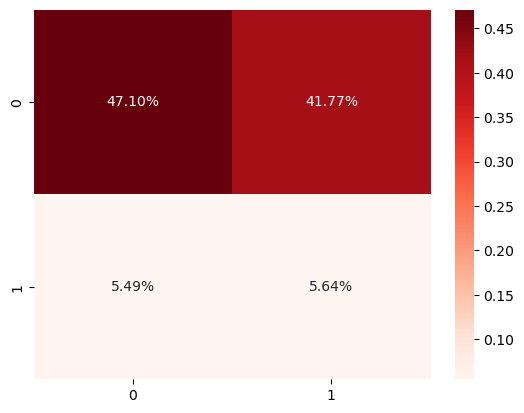

In [168]:
cm1 = confusion_matrix(y_test, pred_lg)
sns.heatmap(cm1/np.sum(cm1), annot = True, fmt=  '0.2%', cmap = 'Reds')

In [169]:
from sklearn.ensemble import RandomForestClassifier

In [170]:
model_rf = RandomForestClassifier(n_estimators=500)
model_rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=500)

In [171]:
model_rf.score(X_test,y_test)

0.788109756097561

In [172]:
pred_rm = model_rf.predict(X_test)

In [173]:
print(classification_report(y_test,pred_rm))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       583
           1       0.16      0.22      0.19        73

    accuracy                           0.79       656
   macro avg       0.53      0.54      0.53       656
weighted avg       0.82      0.79      0.80       656



<Axes: >

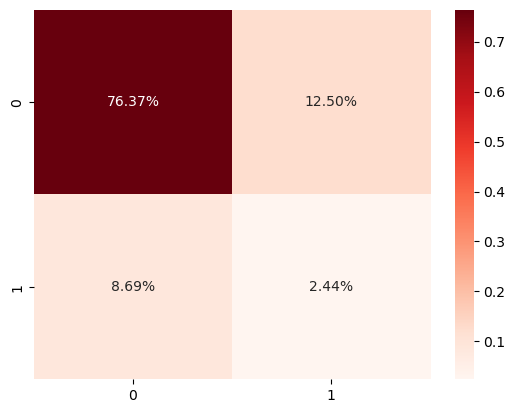

In [174]:
cm2 = confusion_matrix(y_test, pred_rm)
sns.heatmap(cm2/np.sum(cm2), annot = True, fmt=  '0.2%', cmap = 'Reds')

In [175]:
from sklearn.tree import DecisionTreeClassifier

In [176]:
model_dt = DecisionTreeClassifier( random_state=42)

In [177]:
model_dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [178]:
pred_dt = model_dt.predict(X_test)

In [179]:
dt = accuracy_score(y_test, pred_dt)
print(dt)

0.6996951219512195


In [180]:
print(classification_report(y_test,pred_dt))

              precision    recall  f1-score   support

           0       0.90      0.74      0.82       583
           1       0.14      0.34      0.20        73

    accuracy                           0.70       656
   macro avg       0.52      0.54      0.51       656
weighted avg       0.82      0.70      0.75       656



<Axes: >

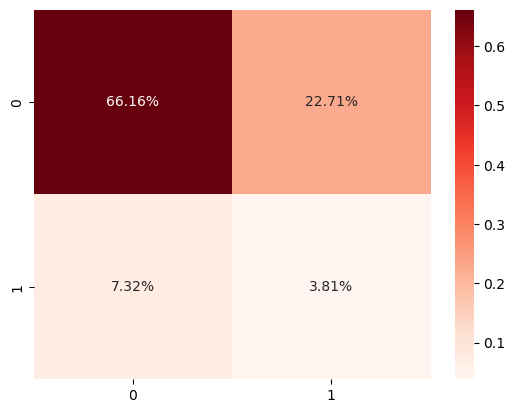

In [181]:
cm3 = confusion_matrix(y_test, pred_dt)
sns.heatmap(cm3/np.sum(cm3), annot = True, fmt=  '0.2%', cmap = 'Reds')

In [182]:
from sklearn.neighbors import KNeighborsClassifier

In [183]:
model_knn = KNeighborsClassifier(n_neighbors=2, leaf_size=20)

In [184]:
model_knn.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=20, n_neighbors=2)

In [185]:
pred_knn = model_knn.predict(X_test)

In [187]:
knn = accuracy_score(y_test, pred_knn)
print(knn)

0.739329268292683


In [189]:
pred_knn = model_knn.predict(X_test)

In [190]:
print(classification_report(y_test,pred_knn))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85       583
           1       0.11      0.19      0.14        73

    accuracy                           0.74       656
   macro avg       0.50      0.50      0.49       656
weighted avg       0.80      0.74      0.77       656



<Axes: >

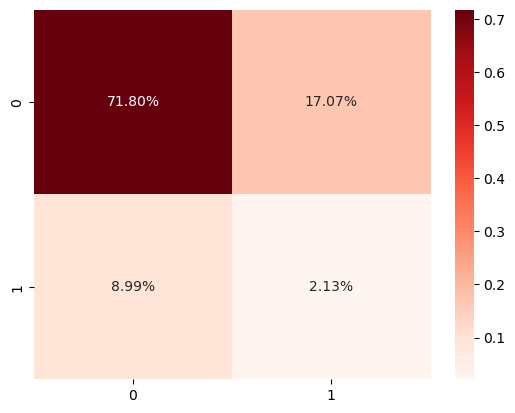

In [191]:
cm4 = confusion_matrix(y_test, pred_knn)
sns.heatmap(cm4/np.sum(cm4), annot = True, fmt=  '0.2%', cmap = 'Reds')